In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('../01_data/train.csv');df

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [3]:
submit = pd.read_csv('../01_data/sample_submission.csv');submit

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0


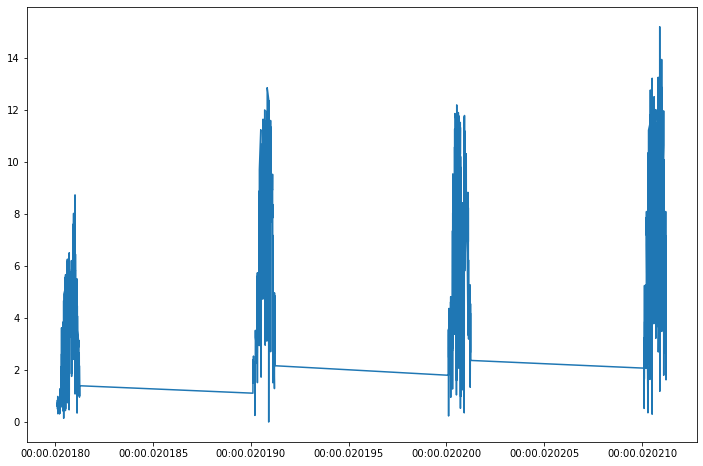

In [7]:
plt.figure(figsize = (12, 8))
plt.plot(df['일시'], df['광진구'])
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      1461 non-null   datetime64[ns]
 1   광진구     1461 non-null   float64       
 2   동대문구    1461 non-null   float64       
 3   성동구     1461 non-null   float64       
 4   중랑구     1461 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [4]:
df_2018 = df.iloc[:365,]
df_2019 = df.iloc[365:730,]
df_2020 = df.iloc[730:1095,]
df_2021 = df.iloc[1095:,]

In [5]:
df_2018['평균'] = df_2018[['광진구', '동대문구', '성동구', '중랑구']].mean(axis = 1)
df_2019['평균'] = df_2019[['광진구', '동대문구', '성동구', '중랑구']].mean(axis = 1)
df_2020['평균'] = df_2020[['광진구', '동대문구', '성동구', '중랑구']].mean(axis = 1)
df_2021['평균'] = df_2021[['광진구', '동대문구', '성동구', '중랑구']].mean(axis = 1)

C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_9112\27210256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['평균'] = df_2018[['광진구', '동대문구', '성동구', '중랑구']].mean(axis = 1)
C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_9112\27210256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['평균'] = df_2019[['광진구', '동대문구', '성동구', '중랑구']].mean(axis = 1)
C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_9112\27210256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

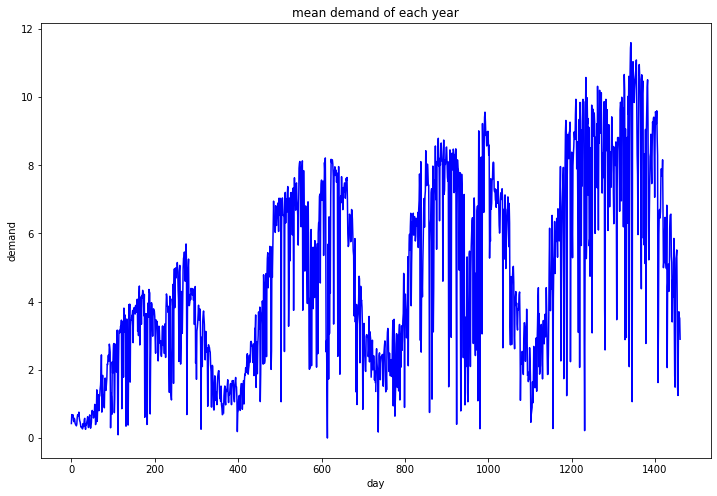

In [6]:
plt.figure(figsize = (12, 8))
plt.plot(df_2018['평균'], color = 'blue')
plt.plot(df_2019['평균'], color = 'blue')
plt.plot(df_2020['평균'], color = 'blue')
plt.plot(df_2021['평균'], color = 'blue')
plt.title('mean demand of each year')
plt.ylabel('demand')
plt.xlabel('day')
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import ndiffs
import pmdarima as pm

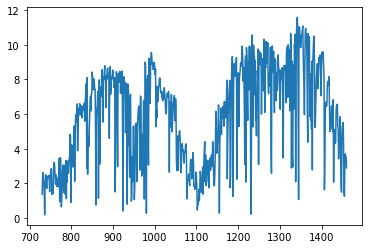

In [34]:
plt.plot((df_2020['평균']))

c:\Users\kgt08\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x576 with 0 Axes>

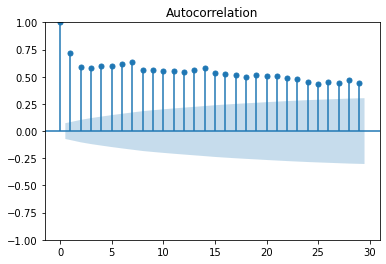

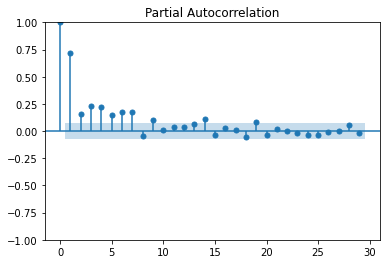

In [37]:
plt.figure(figsize = (12, 8))
plot_acf(df_2020['평균'])
plot_pacf(df_2020['평균'])
plt.show()

In [39]:
kpss_diffs = ndiffs(df_2020['평균'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df_2020['평균'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [41]:
model = pm.auto_arima(df_2020['평균'], d = 1, trace = True)
model.fit(df_2020['평균'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2865.013, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3124.122, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3069.893, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2921.176, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3122.123, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2871.656, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2865.784, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2866.991, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2867.178, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2879.839, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2873.617, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2865.357, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2869.073, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2863.045, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
df_2018_광진구 = df_2018[['일시', '광진구']]
df_2018_동대문구 = df_2018[['일시', '동대문구']]
df_2018_성동구 = df_2018[['일시', '성동구']]
df_2018_중랑구 = df_2018[['일시', '중랑구']]
df_2019_광진구 = df_2019[['일시', '광진구']]
df_2019_동대문구 = df_2019[['일시', '동대문구']]
df_2019_성동구 = df_2019[['일시', '성동구']]
df_2019_중랑구 = df_2019[['일시', '중랑구']]
df_2020_광진구 = df_2020[['일시', '광진구']]
df_2020_동대문구 = df_2020[['일시', '동대문구']]
df_2020_성동구 = df_2020[['일시', '성동구']]
df_2020_중랑구 = df_2020[['일시', '중랑구']]
df_2021_광진구 = df_2021[['일시', '광진구']]
df_2021_동대문구 = df_2021[['일시', '동대문구']]
df_2021_성동구 = df_2021[['일시', '성동구']]
df_2021_중랑구 = df_2021[['일시', '중랑구']]


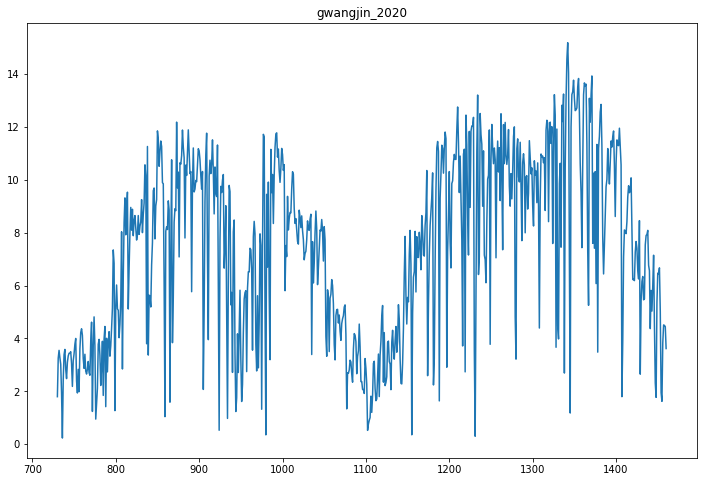

In [50]:
plt.figure(figsize = (12, 8))
plt.title('gwangjin_2020')
df_2020_광진구['광진구'].plot()
plt.show()

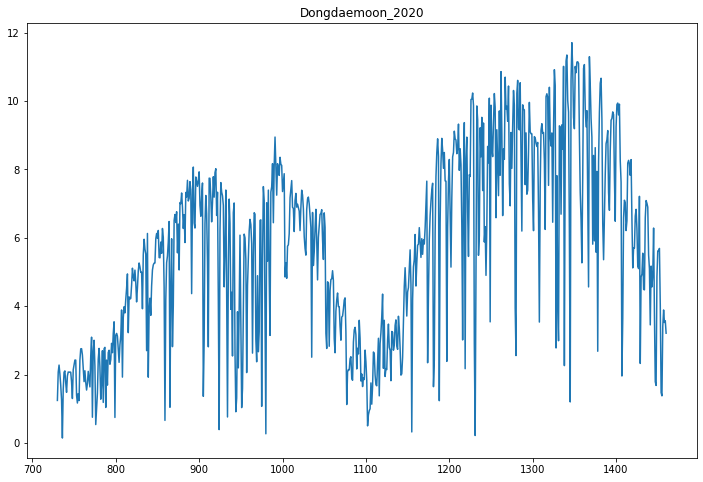

In [51]:
plt.figure(figsize = (12, 8))
plt.title('Dongdaemoon_2020')
df_2020_동대문구['동대문구'].plot()
plt.show()

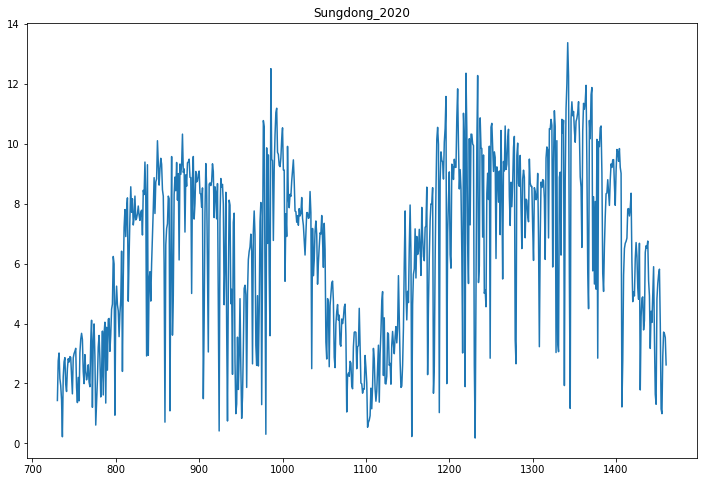

In [52]:
plt.figure(figsize = (12, 8))
plt.title('Sungdong_2020')
df_2020_성동구['성동구'].plot()
plt.show()

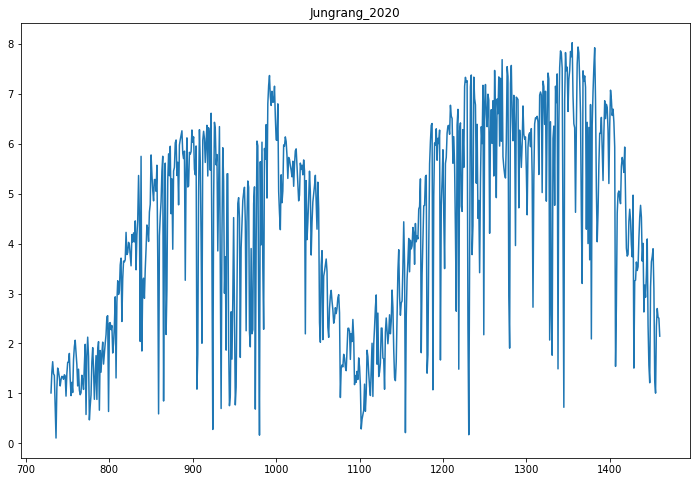

In [53]:
plt.figure(figsize = (12, 8))
plt.title('Jungrang_2020')
df_2020_중랑구['중랑구'].plot()
plt.show()

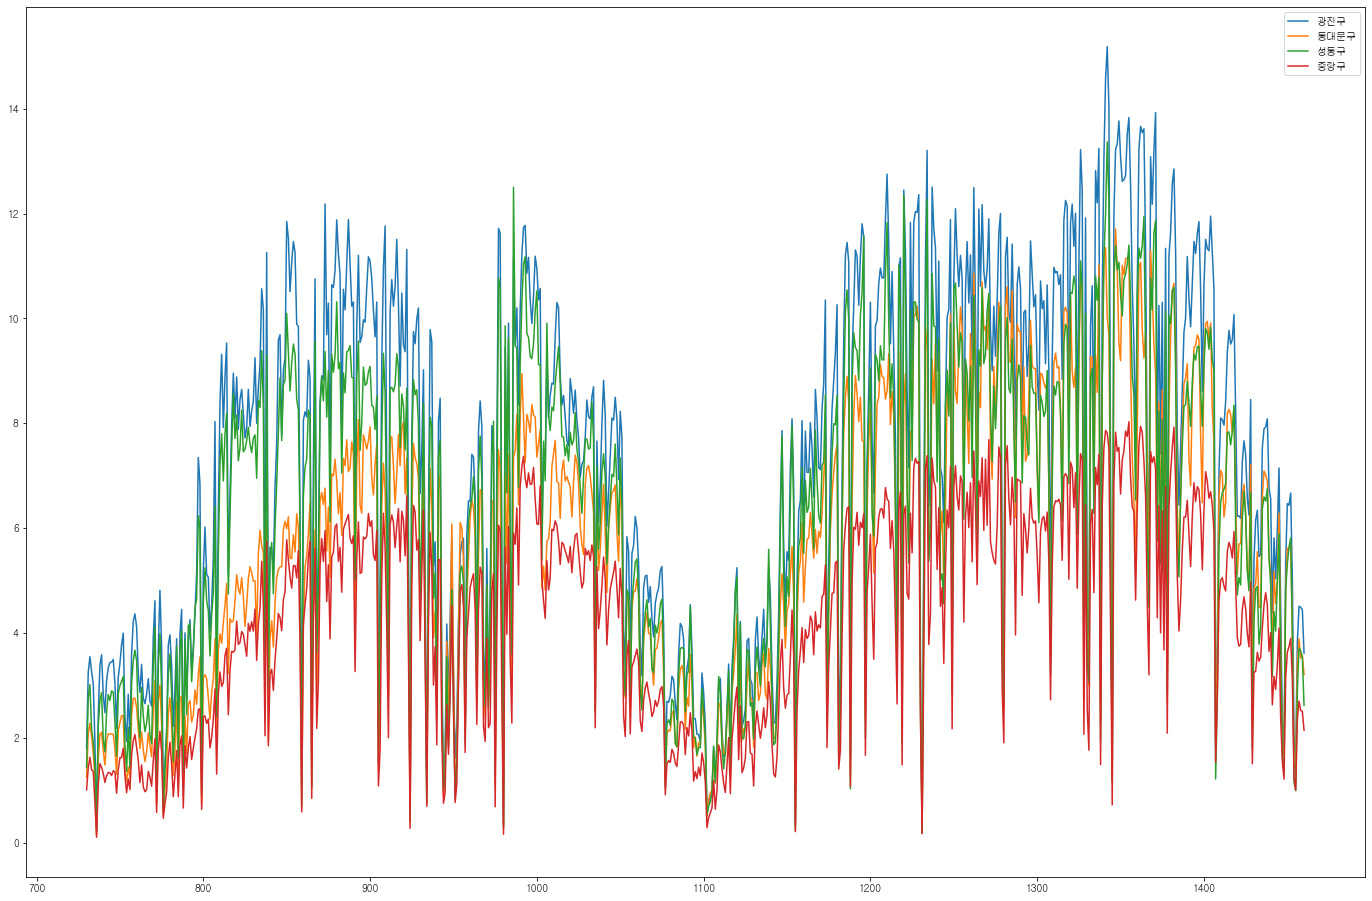

In [58]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize = (24, 16))
df_2020_광진구['광진구'].plot()
df_2020_동대문구['동대문구'].plot()
df_2020_성동구['성동구'].plot()
df_2020_중랑구['중랑구'].plot()
plt.legend()
plt.show()

In [10]:
df_광진구 = df[['일시', '광진구']]
df_동대문구 = df[['일시', '동대문구']]
df_성동구 = df[['일시', '성동구']]
df_중랑구 = df[['일시', '중랑구']]

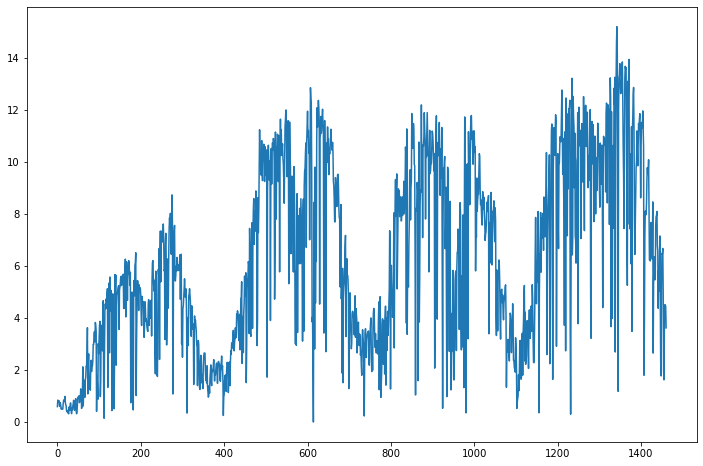

In [16]:
plt.figure(figsize = (12, 8))
df_광진구['광진구'].plot()
plt.show()

In [18]:
df_k = df_광진구['광진구']
df_k.describe()

count    1461.000000
mean        6.209194
std         3.531408
min         0.000000
25%         3.256000
50%         5.740000
75%         9.444000
max        15.184000
Name: 광진구, dtype: float64

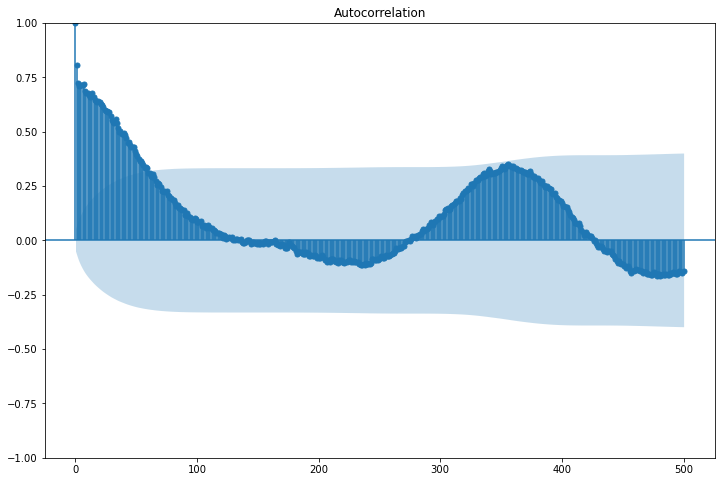

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
plot_acf(df_k, ax = ax, lags = 500)
plt.show()

c:\Users\kyeongtae\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


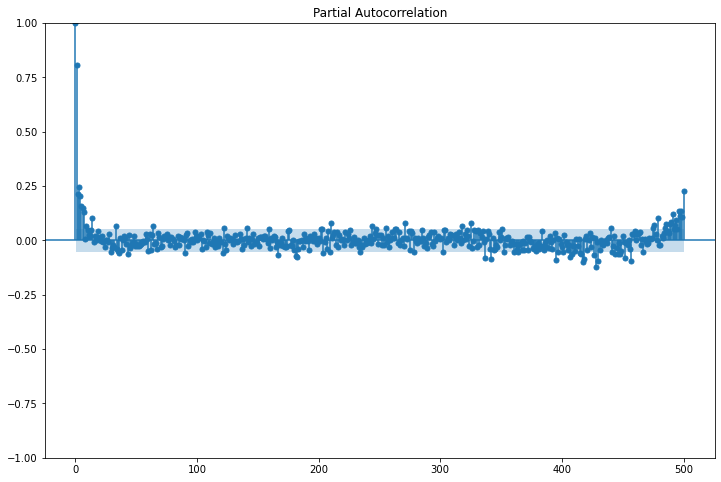

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
plot_pacf(df_k, ax = ax, lags = 500)
plt.show()

In [24]:
kpss_diffs = ndiffs(df_k, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df_k, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


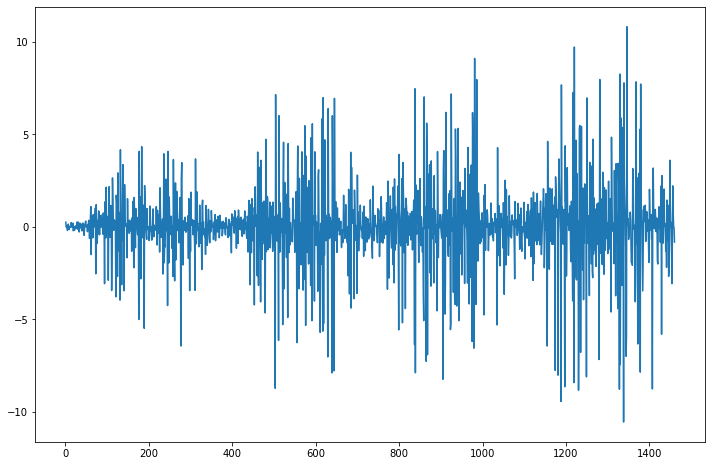

In [31]:
df_k1 = df_k.diff(1)
plt.figure(figsize = (12, 8))
plt.plot(df_k1)
plt.show()

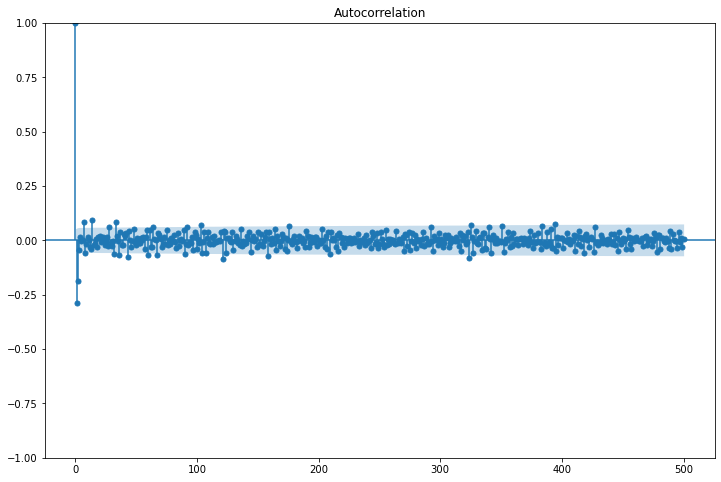

In [36]:
df_k1 = df_k1[1:]
fig, ax = plt.subplots(figsize=(12,8))
plot_acf(df_k1, ax = ax, lags = 500)
plt.show()

c:\Users\kyeongtae\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


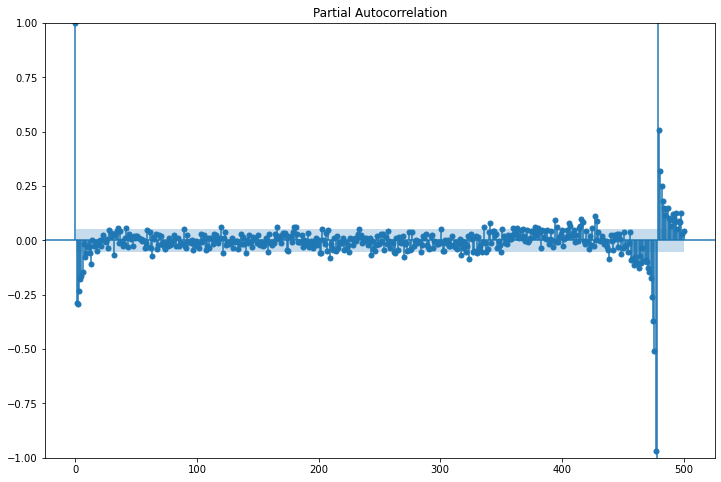

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
plot_pacf(df_k1, ax = ax, lags = 500)
plt.show()

In [41]:
df_k480 = df_k1.diff(480)
df_k480 = df_k480[480:]

c:\Users\kyeongtae\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


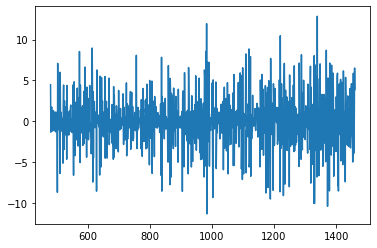

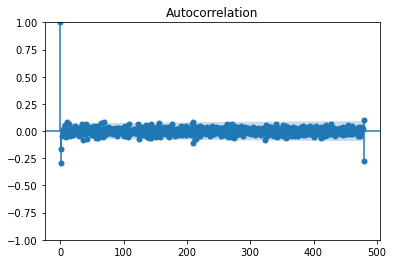

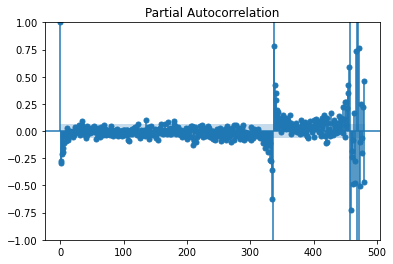

In [46]:
plt.plot(df_k480)
plot_acf(df_k480, lags = 480)
plot_pacf(df_k480, lags = 480)
plt.show()

In [49]:
model = pm.auto_arima(df_k, d = 1, max_d = 3, D = 1, m = 365, seasonal = True, trace = True)
model.fit(df_k)

Performing stepwise search to minimize aic


MemoryError: Unable to allocate 5.86 GiB for an array with shape (734, 734, 1461) and data type float64